## Calcolo di integrali notevoli con il metodo Monte Carlo

L'esempio classico del metodo Monte Carlo (brute force) è il calcolo dell'integrale definito
\begin{align}
I = (b-a) \int_a^b \, f(x)\, \frac{dx}{b-a} = (b-a)\, \langle f \rangle
\end{align}
la cui stima è data dalla media su un campione di $n$ valori della variabile $x$ uniformemente distribuiti nell'intervallo $[a,b]$ 
\begin{align}
I = \frac{(b-a)}{n} \sum_{i=1}^n f(x_i) 
\end{align}

Uniformemente distribuiti significa che la (densità di) probabilità è costante. 
Questo metodo di sampling diventa però molto inefficiente quando la funzione $f(x)$ è diversa da zero soltanto in una regione molto limitata dell'intervallo di integrazione e a maggior ragione se $[a,b]\longrightarrow (-\infty,\infty)$.

Introduciamo quindi il concetto di **importance sampling** immaginando di avere a disposizione una densità di probabilità $p(x)>0$ in $[a,b]$ (normalizzata $\int_a^b  \,p(x)\, dx=1$) che campiona in modo preferenziale l'intervallo di integrazione nella stessa regione in cui $f(x)\ne 0 $ in modo significativo. L'integrale si può riscrivere:

\begin{align}
I = \left\langle \frac{f}{p} \right\rangle_p = \int_a^b  \, \frac{f(x)}{p(x)}\, p(x) dx 
\end{align}
la cui stima sarà data stavolta dalla media su un campione di $n$ valori $\bar{x}_1, \bar{x}_2, \ldots, \bar{x}_n$  distribuiti nell'intervallo $[a,b]$ secondo la densità di probabilità $p(x)$ 
\begin{align}
I = \frac{1}{n} \sum_{i=1}^n \frac{f(\bar{x}_i)}{p(\bar{x}_i)} 
\end{align}

La cosa interessante è che molto spesso in fisica abbiamo a che fare con integrali in cui possiamo separare nell'integrando un termine assimilabile ad una densità di probabilità $ p(x) \ge 0 $, non necessariamente normalizzata per cui con $f(x) = g(x)\cdot p(x)$

\begin{align}
\left\langle g \right\rangle_p  = \frac{\int_{-\infty}^{\infty} \, g(x)\,p(x)\, dx}{\int_{-\infty}^{\infty} \,p(x)\, dx}
\;, \quad \longrightarrow  \left\langle g \right\rangle_p  = \frac{1}{n} \sum_{i=1}^n g(\bar{x}_i) 
\end{align}

Dal punto di vista numerico il problema diventa ora come generare in modo efficiente numeri random distribuiti secondo una densità di probabilità $p(x)$ che possa essere arbirtrariamente scelta. In particolare per il progetto considereremo come caso di interesse $p(x) = | \Psi(x)  |^2 $ dove $\Psi(x)$ sarà una funzione d'onda che descrive lo stato del sistema di interesse.

## Il metodo Monte Carlo di Metropolis

Come si fa a generare numeri a caso secondo una legge di probabilità diversa dalla semplice distribuzione uniforme ?  
*( partendo dalla possibilità di generare in modo efficiente numeri pseudo-random uniformemente distribuiti in $[0,1)$ )*

Il metodo più utilizzato nelle applicazioni fisiche in cui si ha a che fare con sistemi composti da moltissime particelle è quello che è conosciuto con il nome di **Metropolis Monte Carlo** dal nome del primo autore di un famosissimo articolo scientifico del pubblicato nel 1953
 “Equation of state calculations by fast computing machines”, *Metropolis N., Rosenbluth A. W., Rosenbluth M. N., Teller A. H. e Teller E.*, J. Chem. Phys., **21** (1953) 1087.
da un gruppo di fisici dei laboratori nazionali di Los Alamos, *Nick Metropolis*, direttore del progetto MANIAC, (i coniugi) *Rosenbluth* e (i coniugi) *Teller*.
Questo metodo sfrutta l'abilità di un particolare processo stocastico
per generare una successione detta **catena di Markov** i cui elementi, in condizioni stazionarie, sono distribuiti secondo una probabilità limite.
La semplicità del Monte Carlo di Metropolis consiste nel definire un algoritmo in 
base solo alla conoscenza di questa distribuzione limite.

## Un esempio molto semplice per vedere all'opera il Metropolis Monte Carlo

### La distribuzione di Maxwell per la velocità delle particelle di un gas ideale (classico)

Un gas ideale è costituito da un insieme di $N$ particelle non interagenti confinate 
in una regione dello spazio di volume $V$. 
Per $N$ molto grande, anche per un sistema che obbedisce alle leggi Meccanica Classica, 
è impossibile conoscere una per una le posizioni e le velocità di tutte le particelle.
Ma, proprio grazie alla legge dei grandi numeri, il comportamento macroscopico del sistema quando si trova in equilibrio termico, caratterizzato da una temperatura $T$, diventa molto regolare ed è descritto dalle leggi della termodinamica. 
Nella Statistica di Maxwell-Boltzmann per il caso di un gas ideale di particelle non interagenti 
la densità di probabilità dell'ensemble statistico dipende dalla somma 
dell'energia cinetica $E_k$ di singola particella, con massa $m$ e velocità  $(v_x, v_y, v_z)$

\begin{align}
E = \frac{m}{2} \left( v_x^2 + v_y^2 + v_z^2 \right) \;.
\end{align}
la cosiddetta *distribuzione di Maxwell* ($k$ è la costante di Boltzmann e $C$ un opportuno fattore di normalizzazione)
\begin{align}
\mathcal{P}(v_x,v_y,v_z) = C e^{-E/kT} = C \exp\left\{ - \frac{v^2_x + v^2_y + v^2_z}{2 kT/m} \;.\right\} 
\end{align}

Vediamo come con il Monte Carlo di Metropolis si arriva, a partire da una condizione iniziale scelta arbitrariamente, la catena di Markov
si evolve fino a generare configurazioni microscopiche per le velocità di $N$ particelle campionate proporzionalmente alla distribuzione di Maxwell. 

L'**algoritmo di Metropolis** consiste nell'iterare la procedura seguente, 
generando una sequenza ordinata di stati, scandita da un indice intero $\tau$ 
che viene usualmente assimilato al tempo *virtuale* che scandisce la progressione della 
traiettoria del sistema da una condizione iniziale verso quello che sarà il regime stazionario. 

- al tempo $\tau$ la particella sia nello stato $k$-simo descritto
  dalle tre componenti della velocità
  $v_{x}^{(k)},v_{y}^{(k)}\ e\ v_{z}^{(k)}$ a cui corrisponde una 
  probabilità limite $u_k = \mathcal{P}(v_{x}^{(k)},v_{y}^{(k)},v_{z}^{(k)})$;
- si sceglie a caso una componente estraendo un valore 
  $\eta$ nel set $(x,y,z)$  con probabilità uniforme
  $P(x) = P(y) = P(z) = 1/3$;
- si genera un valore di prova della componente $v_{\eta}^{(j)}$  con
  uno spostamento aleatorio uniforme nell'intervallo
  $[-d,d)$. Operativamente si estrae un numero reale
  pseudoaleatorio $\xi$ distribuito con probabilità uniforme in
  $[0,1)$ e si ottiene
  \begin{align}
  v_{\eta}^{(j)} = v_{\eta}^{(k)} + (2\xi - 1)d
  \end{align}
  corrispondente ad uno stato $j$-simo in cui le altre due componenti
  della velocità $\vec{\,v\,}^{(j)}$ rimangono invariate rispetto ai
  valori nello stato $k$-simo;


- si calcola la corrispondente variazione di energia
  $\Delta E_{kj} = \frac{1}{2}\left[ (v_{\eta}^{(j)})^{2} - (v_{\eta}^{(k)})^{2} \right]$, 
  in termini della quale si ha $u_{j}/u_{k} = e^{- \Delta E_{kj}}$:

\begin{align}
\text{se}\left\{
\begin{array}{ll}
  \Delta E_{kj} \leq 0,\ \text{ i.e.  }E_{j} \leq E_{k} \ \Rightarrow \ 
  & \frac{u_{j}}{u_{k}} \geq 1, \text{ al tempo }\tau + 1\text{ si passa allo stato }j\; ; \\
  \\
  \Delta E_{kj} > 0,\text{  i.e.  }E_{j} > E_{k} \  \Rightarrow \ 
  & \text{estratto }\chi\text{ numero pseudoaleatorio uniforme}\\
  & \text{in }\left\lbrack 0,1 \right),\text{ se } \chi \leq \frac{u_{j}}{u_{k}},
  \text{ al tempo }\tau\!+\!1 \text{ si passa} \\
  & \text{allo stato }j,\text{ altrimenti la mossa è rifiutata,}\\
  & \text{al tempo }\tau+1\text{ si resta nello stato } k. 
  \end{array}
 \right.
 \end{align}


### La funzione `metropolis` 

In [1]:
from numba import njit
from numpy import random as rng
from numpy import  zeros, exp
from time import process_time

@njit(fastmath=True)
def metropolis(M,vx0,vy0,vz0,kt,delta):
    """
    Genera una Catena di Markov di lunghezza M 
    per la distribuzione di Maxwell con temperatura kt
    con condizione iniziale (vx0,vy0,vz0) e spostamento
    con probabilità uniforme nell'intervallo [-delta,delta]
    in output 
    count = numero mosse accettate
    vx,vy,vz = array di dimensione M+1 sequenze generate 
    """
    vx   = zeros(M+1)
    vy   = zeros(M+1)
    vz   = zeros(M+1)
    vx[0] = vx0
    vy[0] = vy0
    vz[0] = vz0
#
    count = 0
    vn = zeros(3)
    ekj = 0.5*(vx[0]**2 + vy[0]**2 + vz[0]**2)
    pxj = exp(-ekj/kt)
    for j in range(M):
        vn[0] = vx[j]
        vn[1] = vy[j]
        vn[2] = vz[j]
        nu = rng.randint(3)
        vn[nu] += (2.*rng.uniform(0.,1.) - 1.)*delta
        ekn = 0.5*(vn[0]**2 + vn[1]**2 + vn[2]**2)
        pxn = exp(-ekn/kt)
        wt = pxn/pxj
        if wt >= rng.uniform(0.,1.):
            vx[j+1] = vn[0]
            vy[j+1] = vn[1]
            vz[j+1] = vn[2]
            ekj = ekn
            pxj = pxn
            count += 1.
        else :
            vx[j+1] = vx[j]
            vy[j+1] = vy[j]
            vz[j+1] = vz[j]
    return count,vx,vy,vz

### funzioni per la visualizzazione grafica

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

def distribution(it,xmin,xmax,ux,uy,uz,kt,figura='histovel.pdf'):
    xg = np.linspace(xmin,xmax,200)
    gau = np.exp(-xg**2/(2*kt))/np.sqrt(2.*np.pi*kt)
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,4), dpi=100)
    f.subplots_adjust(wspace=0.05, hspace=None)
# histogram our data with numpy
    nx, xbins = np.histogram(ux[:,it], 51, range=(xmin,xmax), density=True)
# get the corners of the rectangles for the histogram
    xleft = np.array(xbins[:-1])
    xright = np.array(xbins[1:])
    xbottom = np.zeros(len(xleft))
    xtop = xbottom + nx
# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
    XYx = np.array([[xleft, xleft, xright, xright], [xbottom, xtop, xtop, xbottom]]).T
# get the Path object
    xbarpath = path.Path.make_compound_path_from_polys(XYx)
# make a patch out of it
    xpatch = patches.PathPatch(xbarpath, facecolor='r', alpha=0.5)
    ax1.add_patch(xpatch)
# update the view limits
    #ax1.set_xlim(left[0], right[-1])
    ax1.set_xlim(xmin,xmax)
    ymax=xtop.max()
    ax1.set_ylim(xbottom.min(), ymax*1.02)
    ax1.plot(xg,gau,'-k',lw=2, alpha=0.45)
    #ax1.axhline(1.,color='blue', alpha=0.5)
# histogram our data with numpy
    n, bins = np.histogram(uy[:,it], 51, range=(xmin,xmax), density=True)
# get the corners of the rectangles for the histogram
    left = np.array(bins[:-1])
    right = np.array(bins[1:])
    bottom = np.zeros(len(left))
    top = bottom + n
# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
    XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T
# get the Path object
    barpath = path.Path.make_compound_path_from_polys(XY)
# make a patch out of it
    patch = patches.PathPatch(barpath, facecolor='b', alpha=0.5)
    ax2.add_patch(patch)
# update the view limits
    #ax1.set_xlim(left[0], right[-1])
    ax2.set_xlim(xmin, xmax)
    if top.max()>ymax:
        ymax=top.max()
    ax2.set_ylim(bottom.min(), ymax*1.02)
    ax2.plot(xg,gau,'-k',lw=2, alpha=0.45)
    #ax1.axhline(1.,color='blue', alpha=0.5)
# histogram our data with numpy
    nz, zbins = np.histogram(uz[:,it], 51, range=(xmin,xmax), density=True)
# get the corners of the rectangles for the histogram
    zleft = np.array(zbins[:-1])
    zright = np.array(zbins[1:])
    zbottom = np.zeros(len(zleft))
    ztop = zbottom + nz
# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
    XYz = np.array([[zleft, zleft, zright, zright], [zbottom, ztop, ztop, zbottom]]).T
# get the Path object
    zbarpath = path.Path.make_compound_path_from_polys(XYz)
# make a patch out of it
    zpatch = patches.PathPatch(zbarpath, facecolor='g', alpha=0.5)
    ax3.add_patch(zpatch)
# update the view limits
    #ax1.set_xlim(left[0], right[-1])
    ax3.set_xlim(xmin, xmax)
    if ztop.max()> ymax:
        ymax=ztop.max()
    ax3.set_ylim(zbottom.min(), ymax*1.02)
    ax3.plot(xg,gau,'-k',lw=2, alpha=0.45)
    #ax1.axhline(1.,color='blue', alpha=0.5)
    plt.rcParams.update({'font.size': 16})
    plt.title(r'$ \tau =$'+str(it))
    plt.savefig(figura)
    plt.show()

def timeavg(M,nval,ux,uy,uz,kt):
    vxavg = np.zeros(M+1)
    vyavg = np.zeros(M+1)
    vzavg = np.zeros(M+1)
    v2avg = np.zeros(M+1)
    for j in range(M+1):
        vxavg[j] = np.sum(ux[:,j])/nval
        vyavg[j] = np.sum(uy[:,j])/nval
        vzavg[j] = np.sum(uz[:,j])/nval
        v2avg[j] = np.sum(ux[:,j]**2 + uy[:,j]**2 + uz[:,j]**2)/nval
    tt = np.arange(M+1)
    ft, ax = plt.subplots(1, 1, figsize=(9,5), dpi=100)
    ax.plot(tt[:M+1],vxavg[:M+1],'-r',label=r"$\langle\upsilon_x\rangle$")
    ax.plot(tt[:M+1],vyavg[:M+1],'-b',label=r"$\langle\upsilon_y\rangle$")
    ax.plot(tt[:M+1],vzavg[:M+1],'-g',label=r"$\langle\upsilon_z\rangle$")
    ax.axhline(0.,color='black', alpha=0.4)
    ax.set_xlim(-1, M+2)
    #ax.set_ylim(ibottom.min(), itop.max()*1.02)
    #ax1.axhline(1.,color='blue', alpha=0.5)
    plt.rcParams.update({'font.size': 16})
    plt.xticks([0,250,500,750,1000],['$0$','$250$','$500$','$750$','$1000$'])
    plt.legend(loc='best',fontsize=14)
    plt.rcParams.update({'font.size': 12})
    plt.title('Evoluzione valor medio delle componenti della velocità')
    plt.savefig('timeavgv.pdf')
    plt.show()
    fu, ay = plt.subplots(1, 1, figsize=(9,5), dpi=100)
    ay.plot(tt[:M+1],v2avg[:M+1],'-k',label=r"$\langle\,\upsilon^2\rangle$")
    ay.axhline(0.,color='black', alpha=0.4)
    ay.axhline(3*kt,color='red', alpha=0.4)
    ay.set_xlim(-1, M+2)
    plt.rcParams.update({'font.size': 16})
    plt.xticks([0,250,500,750,1000],['$0$','$250$','$500$','$750$','$1000$'])
    plt.legend(loc='best',fontsize=14)
    plt.rcParams.update({'font.size': 12})
    plt.title('Evoluzione valor medio del modulo quadro della velocità')
    plt.savefig('timeavgv2.pdf')
    plt.show()

### il programma principale

 cputime per il run MC  500-simo =  0.00004 s
 percentuale mosse accettate:   87.7 
 cputime per il run MC 1000-simo =  0.00004 s
 percentuale mosse accettate:   88.5 
 cputime per il run MC 1500-simo =  0.00004 s
 percentuale mosse accettate:   87.0 
 cputime per il run MC 2000-simo =  0.00004 s
 percentuale mosse accettate:   86.6 
 cputime per il run MC 2500-simo =  0.00004 s
 percentuale mosse accettate:   85.6 
 cputime per il run MC 3000-simo =  0.00004 s
 percentuale mosse accettate:   89.1 
 cputime per il run MC 3500-simo =  0.00004 s
 percentuale mosse accettate:   88.2 
 cputime per il run MC 4000-simo =  0.00004 s
 percentuale mosse accettate:   89.1 
 cputime per il run MC 4500-simo =  0.00004 s
 percentuale mosse accettate:   87.4 
 cputime per il run MC 5000-simo =  0.00004 s
 percentuale mosse accettate:   89.8 
 cputime per il run MC 5500-simo =  0.00006 s
 percentuale mosse accettate:   91.2 
 cputime per il run MC 6000-simo =  0.00004 s
 percentuale mosse accettate: 

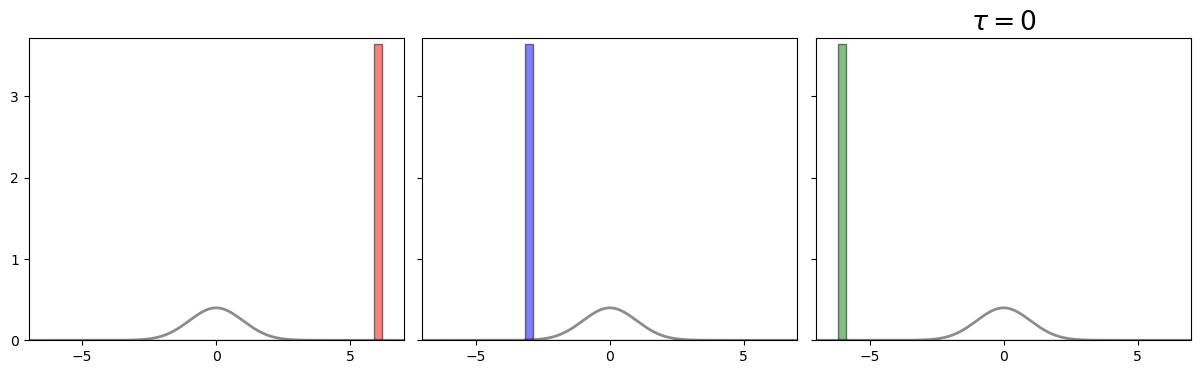

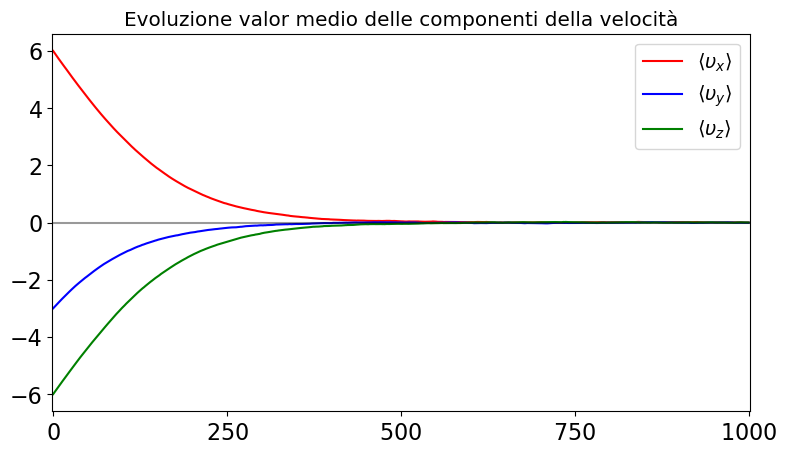

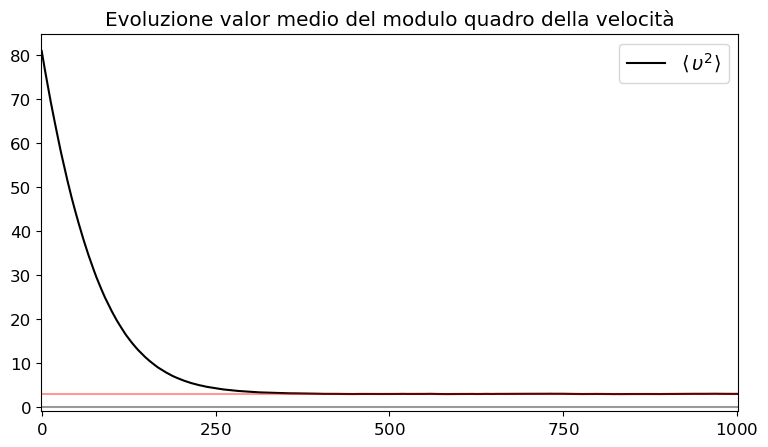

In [3]:
if __name__ == "__main__":
    """
    npar = numero di sequenze di Markov generate indipendentemente
    kt, delta = parametri Monte Carlo (vedi funzione metropolis)
    """
    npar = 10000
    M = 1000
    kt = 1.
    delta = 0.5
    # allocazione array di dimensione (nval,MEq+1) dove memorizzare le sequenze
    ux = np.zeros((npar,M+1))
    uy = np.zeros((npar,M+1))
    uz = np.zeros((npar,M+1))
    # Condizione iniziale comune a tutte le nval sequenze
    vx0 = 6.
    vy0 = -3.
    vz0 = -6.
    # ciclo che genera npar sequenze indipendenti
    for i in range(npar) :
    # single Markov chain
        tic = process_time()
        # generazione sequenza i-sima 
        acc,ux[i,:],uy[i,:],uz[i,:] = metropolis(M,vx0,vy0,vz0,kt,delta)
        toc = process_time()
        if (i+1)%500==0:
            print(" cputime per il run MC %4d-simo = %8.5f s" % (i+1,toc-tic) )
            print(" percentuale mosse accettate:  %5.1f " % (100*acc/M))
    # distribuzione iniziale
    it = 0 # 0 # 
    xmin=-7.
    xmax=7.
    distribution(it,xmin,xmax,ux,uy,uz,kt)  
    # medie temporali
    timeavg(M,npar,ux,uy,uz,kt)

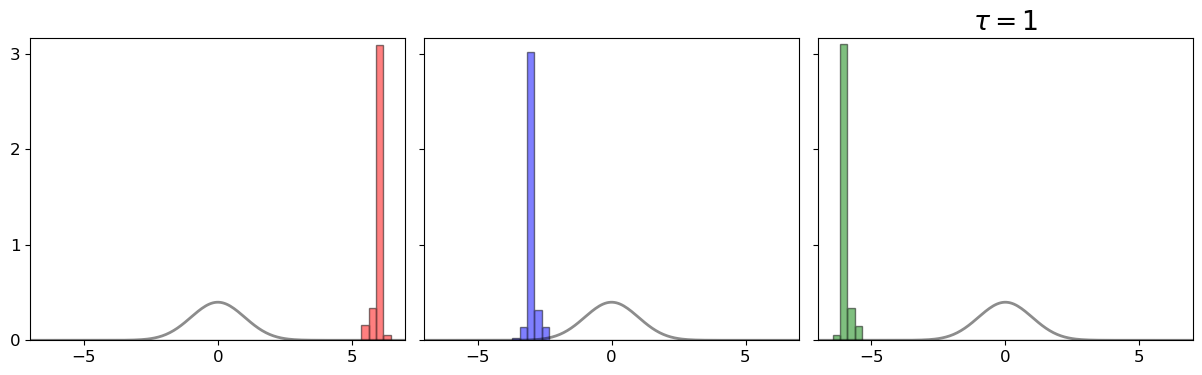

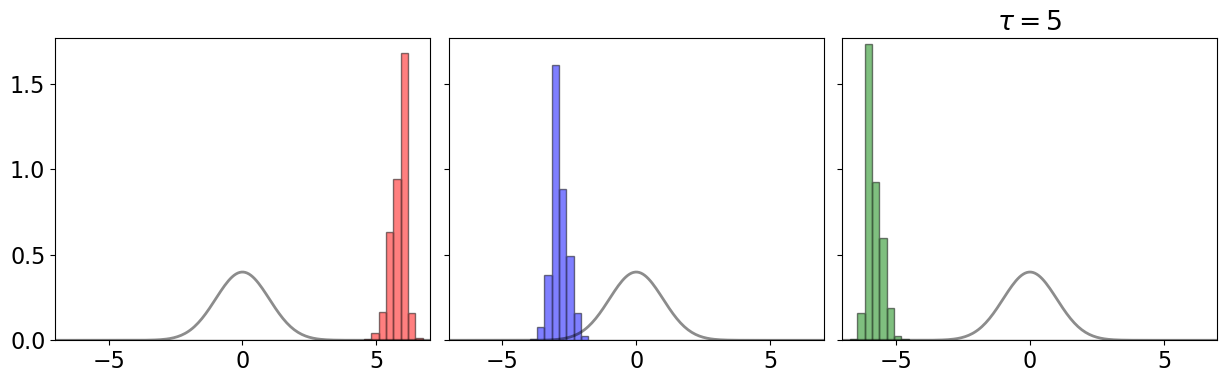

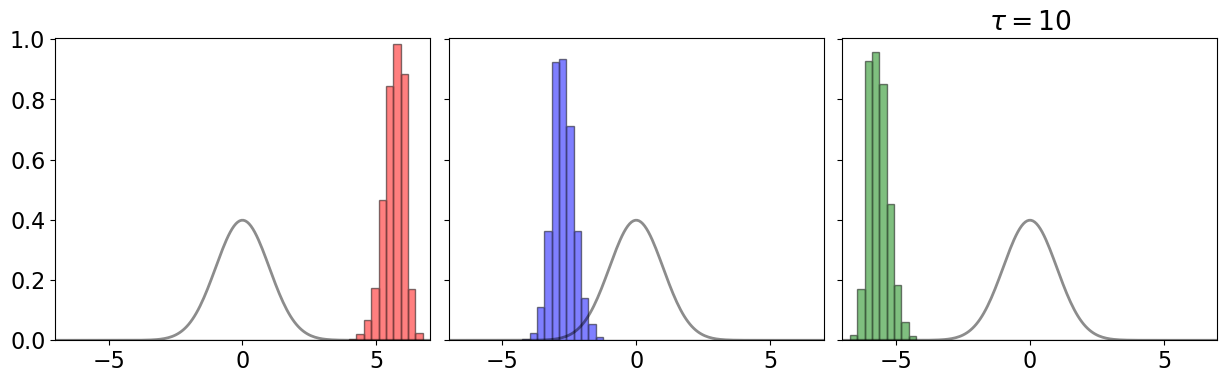

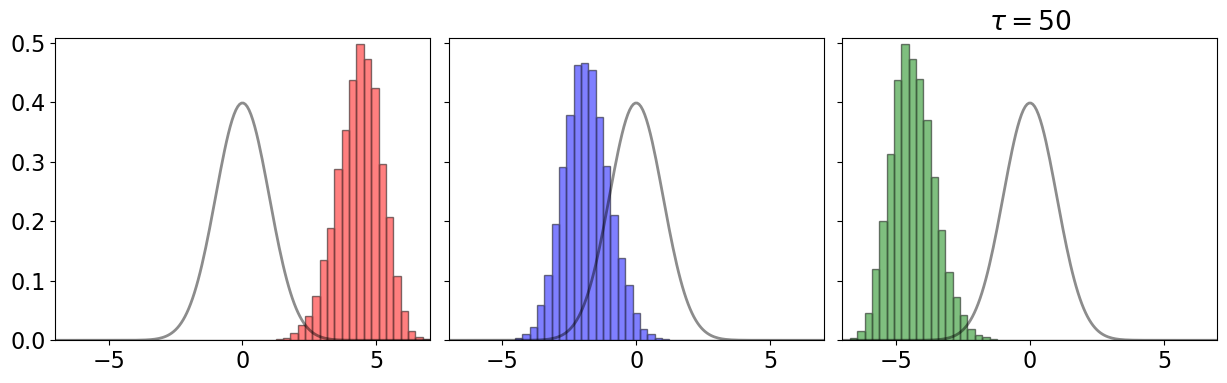

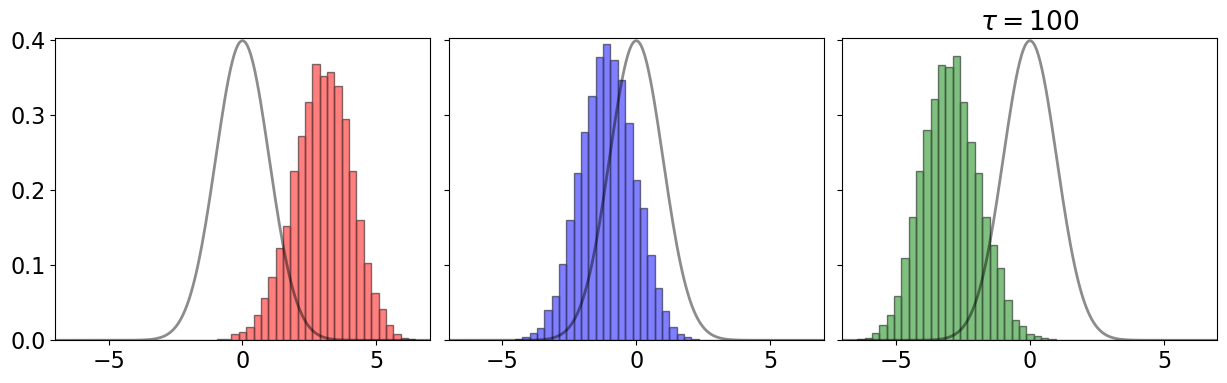

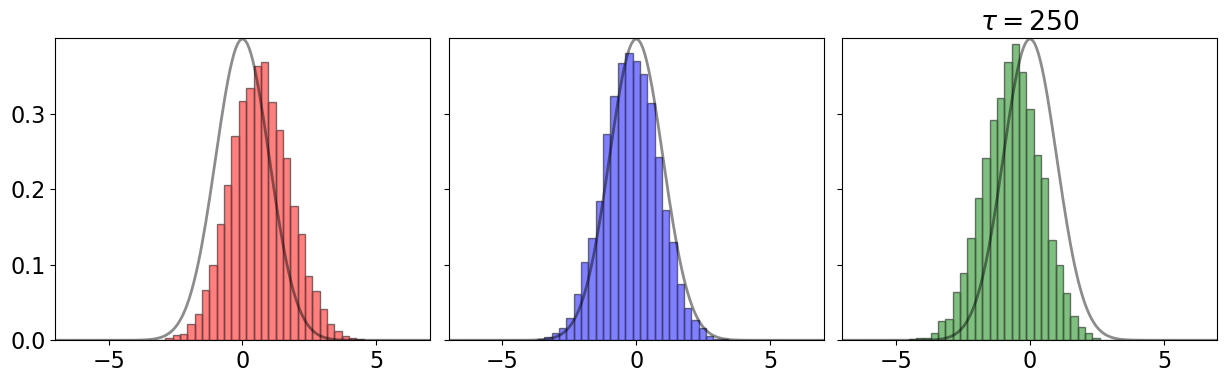

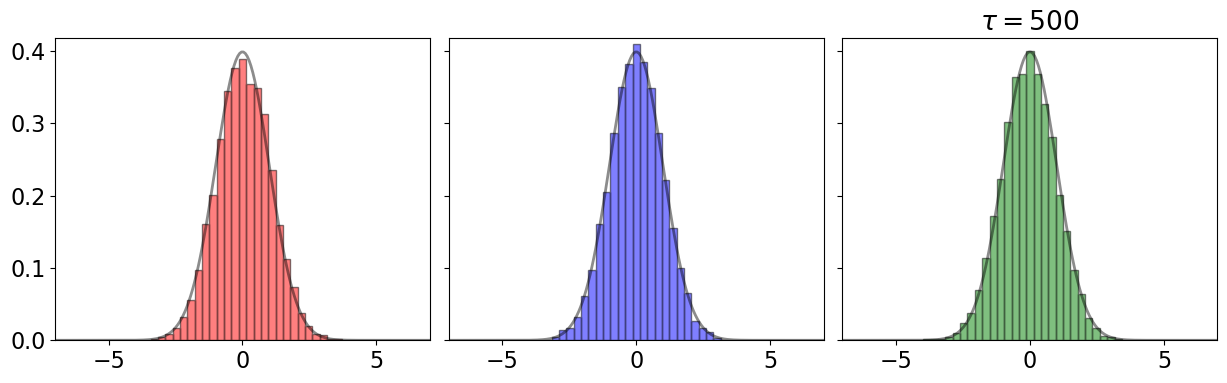

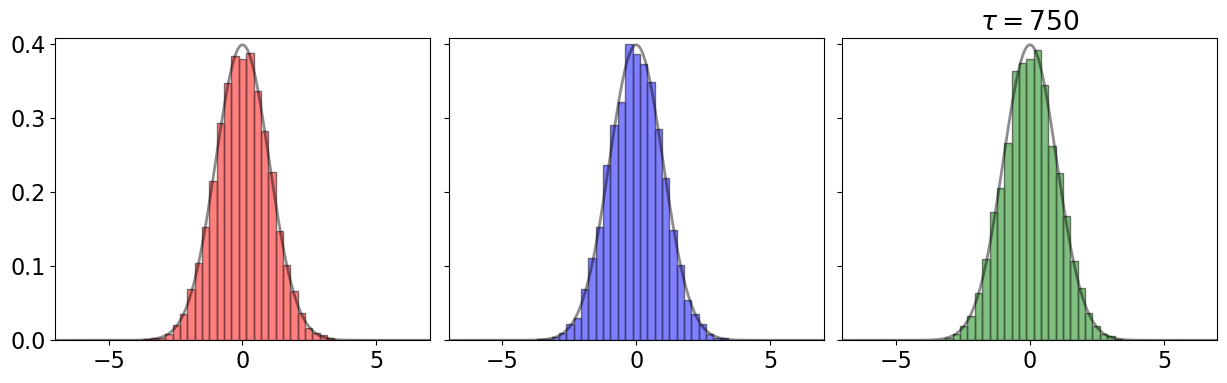

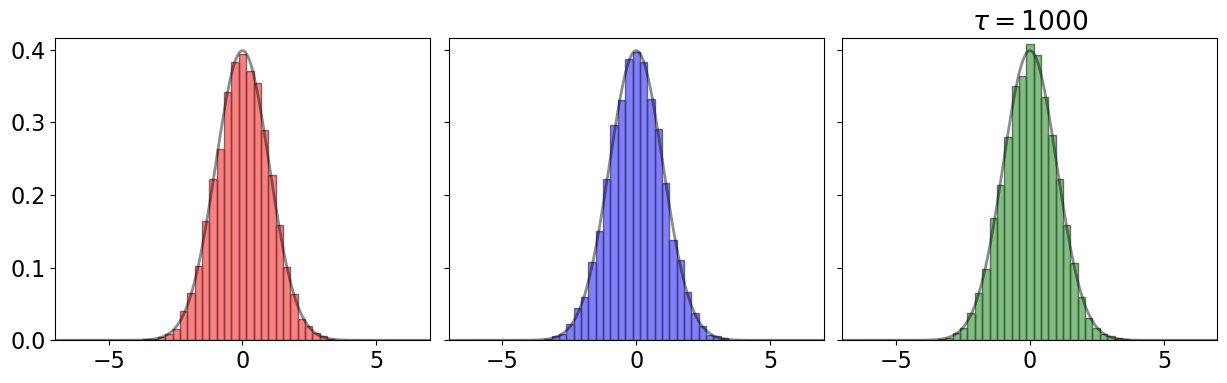

In [4]:
# evoluzione della distribuzione
if __name__ == "__main__": 
    xmin=-7.
    xmax=7.
    steps=[1,5,10,50,100,250,500,750,1000]
    for it in steps:
        distribution(it,xmin,xmax,ux,uy,uz,kt)